In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Separate features and target variable
X_train = df.drop(["Id", "SalePrice"], axis=1)
y_train = df["SalePrice"]

In [6]:
# Identify numerical and categorical columns dynamically
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object"]).columns.tolist()

In [7]:
# Pipeline for numerical features: impute missing values and scale
numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [8]:
# Pipeline for categorical features: impute missing values and one-hot encode
categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

In [9]:
# Combine both pipelines into a full preprocessor
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_pipeline, numeric_features),
    ("cat", categorical_pipeline, categorical_features)
])

In [10]:
# Create a full pipeline including RandomForestRegressor model
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

In [11]:
# Fit the pipeline on the training data
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQual...
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('model', RandomForestRegressor(random_state=42))])

In [12]:
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [13]:
# Ensure the preprocessing works correctly by selecting the same features
test_ids = df_test["Id"]  # Preserve IDs for submission
X_test_unseen = df_test.drop("Id", axis=1)

In [14]:
# Apply the trained pipeline to generate predictions
y_pred_unseen = model_pipeline.predict(X_test_unseen)

In [15]:
# Create a submission DataFrame
submission = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": y_pred_unseen
})

In [16]:
# Save the predictions to a CSV file
submission.to_csv("submission.csv", index=False)

In [17]:
print("Predictions saved to submission.csv")

Predictions saved to submission.csv


In [18]:
submission = pd.read_csv("submission.csv")

In [19]:
print(submission.head())

     Id  SalePrice
0  1461  129836.08
1  1462  156844.34
2  1463  182962.90
3  1464  182419.22
4  1465  195425.64


In [20]:
print(submission.info())  # Check for missing values and data types
print(submission.describe())  # Get summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB
None
                Id      SalePrice
count  1459.000000    1459.000000
mean   2190.000000  178913.473105
std     421.321334   73114.342728
min    1461.000000   59183.810000
25%    1825.500000  130216.330000
50%    2190.000000  157070.360000
75%    2554.500000  211019.710000
max    2919.000000  533103.030000


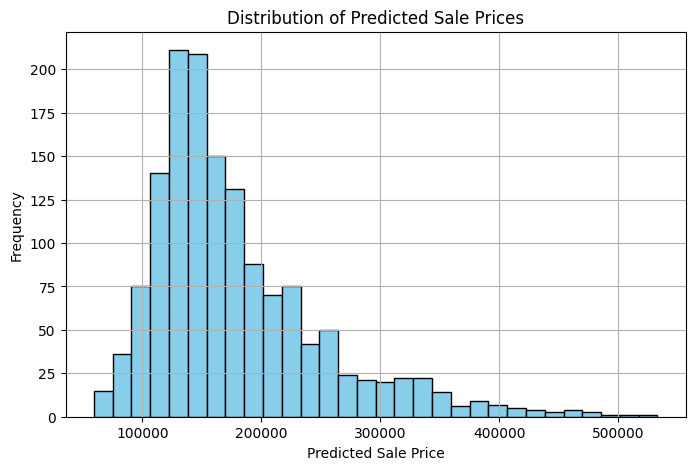

In [21]:
#We can checkout the distribution:

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(submission["SalePrice"], bins=30, color="skyblue", edgecolor="black")
plt.xlabel("Predicted Sale Price")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Sale Prices")
plt.grid(True)
plt.show()